In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_config, get_file_avg

In [21]:
file_path = '../output/utilization/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/utilization_cfg.json')

criticality_prob_list = cfg['critical_prob_list']
ours = [0.0] * len(criticality_prob_list)
wo = [0.0] * len(criticality_prob_list)

In [22]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    our_utilization, wo_utilization = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    ours[index] += our_utilization
    wo[index] += wo_utilization

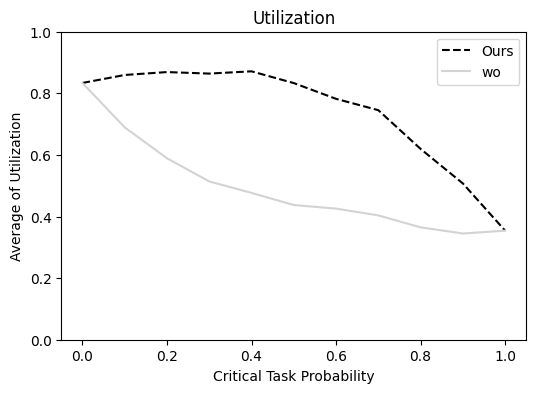

In [23]:
plt.figure(figsize=(6,4))

plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed')
plt.plot(criticality_prob_list, wo, label='wo', color='lightgray')

# # set y lim
plt.ylim(0, 1)

plt.title('Utilization')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of Utilization')
plt.legend()
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]